In [1]:
import os

# Print the contents of the Kaggle input directory to verify the dataset location
kaggle_input_directory = '/users/ashishkishore/downloads/food101'
print(os.listdir(kaggle_input_directory))


['food-101']


In [2]:
if "food-101" in os.listdir():
    print("Dataset already exists")
else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz > /dev/null 2>&1
    print("Extraction done!")

--2024-01-27 10:24:18--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2024-01-27 10:24:19--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: 'food-101.tar.gz'

food-101.tar.gz     100%[===================>]   4.65G  23.2MB/s    in 3m 50s  

2024-01-27 10:28:09 (20.7 MB/s) - 'food-101.tar.gz' saved [4996278331/4996278331]

Dataset downloaded!
Extracting data..
Extraction done!


In [3]:
classes = open("./food-101/meta/classes.txt", 'r').read().splitlines()
classes_10 = classes[:10] + ['other']
classes_10, len(classes_10)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'other'],
 11)

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


data_path = '/kaggle/input/food-101/food-101/food-101/images'
class_names_file_path = '/kaggle/input/food-101/food-101/food-101/meta/classes.txt'

# 1. Check the number of classes
classes = os.listdir(os.path.join(data_path))
num_classes = len(classes)

print(f"Number of Classes: {num_classes}")
print("Classes:", classes)

Number of Classes: 102
Classes: ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 'ice_cream', 'risotto', 'club_sandwich', 'stra

In [5]:
import os
data_path = 'users/ashishkishore/downloads/food-101/food-101/food-101/images'

# Get the list of class folders
class_folders = os.listdir(data_path)

# Create a dictionary to store the count of images for each class
class_image_counts = {}

# Iterate through each class folder and count the number of images
for class_folder in class_folders:
    class_path = os.path.join(data_path, class_folder)
    if os.path.isdir(class_path):
        # Count the number of files (images) in the class folder
        num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_image_counts[class_folder] = num_images

# Display the number of images per class
for class_name, num_images in class_image_counts.items():
    print(f"Class: {class_name}, Number of Images: {num_images}")




Class: macarons, Number of Images: 1000
Class: french_toast, Number of Images: 1000
Class: lobster_bisque, Number of Images: 1000
Class: prime_rib, Number of Images: 1000
Class: pork_chop, Number of Images: 1000
Class: guacamole, Number of Images: 1000
Class: baby_back_ribs, Number of Images: 1000
Class: mussels, Number of Images: 1000
Class: beef_carpaccio, Number of Images: 1000
Class: poutine, Number of Images: 1000
Class: hot_and_sour_soup, Number of Images: 1000
Class: seaweed_salad, Number of Images: 1000
Class: foie_gras, Number of Images: 1000
Class: dumplings, Number of Images: 1000
Class: peking_duck, Number of Images: 1000
Class: takoyaki, Number of Images: 1000
Class: bibimbap, Number of Images: 1000
Class: falafel, Number of Images: 1000
Class: pulled_pork_sandwich, Number of Images: 1000
Class: lobster_roll_sandwich, Number of Images: 1000
Class: carrot_cake, Number of Images: 1000
Class: beet_salad, Number of Images: 1000
Class: panna_cotta, Number of Images: 1000
Class:

# **3) Data Visualization**

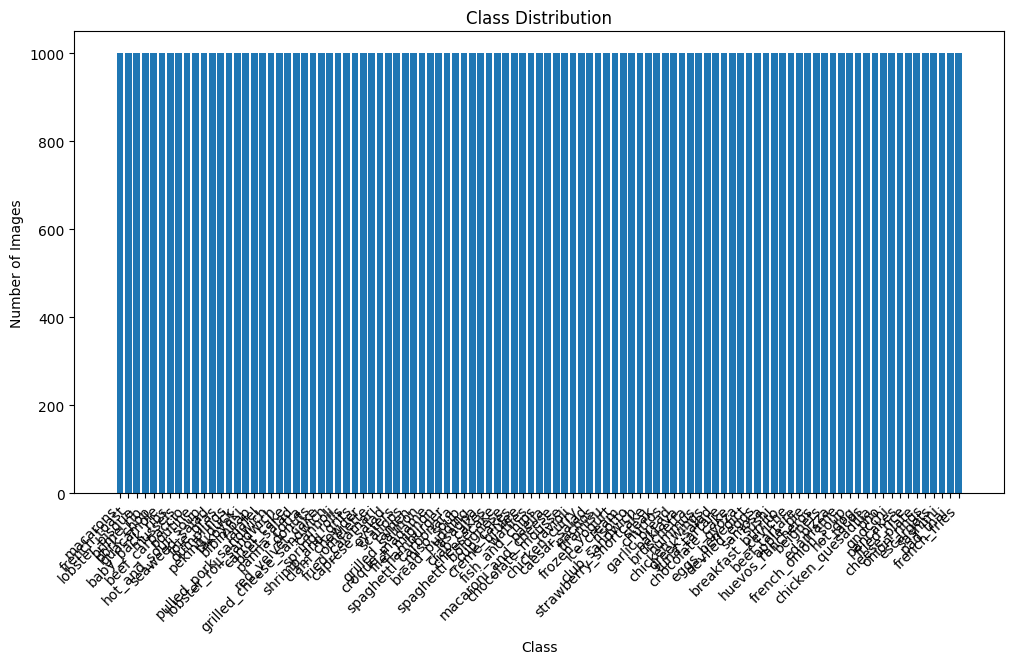

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(class_image_counts.keys(), class_image_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

# **4) Image size**

In [7]:
sample_image_path = os.path.join(data_path, classes[0], os.listdir(os.path.join(data_path, classes[0]))[0])
sample_image = cv2.imread(sample_image_path)
image_size = sample_image.shape[:2]

print(f"Image Size: {image_size}")

Image Size: (384, 512)


# **5) Rescalling (this may be removed. still testing)**

In [8]:
%%time

import os
import cv2

data_path = '/kaggle/input/food-101/food-101/food-101/images'
# ouput_path = ''
dirs = os.listdir(data_path)

# Function for rescaling all images in the given directory
def rescale():
    try:
        for c in dirs:
            ch_path = os.path.join(data_path, c)
            if os.path.isdir(ch_path) and c != '.DS_Store':
                print(f'Resizing {c} images')
                for f in os.listdir(os.path.join(ch_path, "")):
                    img_path = os.path.join(ch_path, f)
                    if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png'):
                        img = cv2.imread(img_path)
                        imgRescale = cv2.resize(img, (255, 255))
                        # Save the resized image to the correct folder
                        output_path_rescaled = os.path.join(ch_path,f'{os.path.splitext(f)[0]}.jpg')
                        cv2.imwrite(output_path_rescaled, imgRescale)
                        # print(output_path_rescaled)
    except Exception as error:
        print(f"An error has occurred: {error}")
#rescale()

CPU times: user 1.82 ms, sys: 127 µs, total: 1.95 ms
Wall time: 1.31 ms


In [9]:
from collections import defaultdict
from shutil import copy

# Helper method to split dataset into train and test folders
def prepare_data(filepath, src, dest):
    classes_images = defaultdict(list)
    with open(filepath, 'r') as txt:
        paths = [read.strip() for read in txt.readlines()]
        for p in paths:
            food = p.split('/')
            classes_images[food[0]].append(food[1] + '.jpg')

    for food in classes_images.keys():
        print("\nCopying images into",food)
        if not os.path.exists(os.path.join(dest,food)):
            os.makedirs(os.path.join(dest,food))
        for i in classes_images[food]:
            copy(os.path.join(src,food,i), os.path.join(dest,food,i))
    print("Copying Done!")

In [10]:
# Training
train_file_path = '/kaggle/input/food-101/food-101/food-101/meta/train.txt'

%cd /
print("Creating train data...")
prepare_data(train_file_path, data_path, 'train')

/
Creating train data...

Copying images into apple_pie

Copying images into baby_back_ribs

Copying images into baklava

Copying images into beef_carpaccio

Copying images into beef_tartare

Copying images into beet_salad

Copying images into beignets

Copying images into bibimbap

Copying images into bread_pudding

Copying images into breakfast_burrito

Copying images into bruschetta

Copying images into caesar_salad

Copying images into cannoli

Copying images into caprese_salad

Copying images into carrot_cake

Copying images into ceviche

Copying images into cheesecake

Copying images into cheese_plate

Copying images into chicken_curry

Copying images into chicken_quesadilla

Copying images into chicken_wings

Copying images into chocolate_cake

Copying images into chocolate_mousse

Copying images into churros

Copying images into clam_chowder

Copying images into club_sandwich

Copying images into crab_cakes

Copying images into creme_brulee

Copying images into croque_madame

C

In [11]:
# Testing
test_file_path = '/kaggle/input/food-101/food-101/food-101/meta/test.txt'

print("Creating test data...")
prepare_data(test_file_path, data_path, 'test')

Creating test data...

Copying images into apple_pie

Copying images into baby_back_ribs

Copying images into baklava

Copying images into beef_carpaccio

Copying images into beef_tartare

Copying images into beet_salad

Copying images into beignets

Copying images into bibimbap

Copying images into bread_pudding

Copying images into breakfast_burrito

Copying images into bruschetta

Copying images into caesar_salad

Copying images into cannoli

Copying images into caprese_salad

Copying images into carrot_cake

Copying images into ceviche

Copying images into cheesecake

Copying images into cheese_plate

Copying images into chicken_curry

Copying images into chicken_quesadilla

Copying images into chicken_wings

Copying images into chocolate_cake

Copying images into chocolate_mousse

Copying images into churros

Copying images into clam_chowder

Copying images into club_sandwich

Copying images into crab_cakes

Copying images into creme_brulee

Copying images into croque_madame

Copy

In [12]:
# Import libraries for CNN
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
# Defining the hyperparameters and placeholders
batch_size = 32 # can be 16
n_epochs = 50
learn_rate = 0.001

In [14]:
img_height, img_width = 255, 255
train_data_dir = 'train'
test_data_dir = 'test'
n_train_samples = 75750
n_test_samples = 25250

In [15]:
# Rescales the image using ImageDataGenerator
# Training
# Training data generator
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' for integer-encoded labels
    shuffle=True
)

Found 75750 images belonging to 101 classes.


In [16]:
# Testing
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(255, 255),
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' for integer-encoded labels
    shuffle=False
)

Found 25250 images belonging to 101 classes.


In [17]:
num_classes = 101
# Create a sequential model
model = models.Sequential()

# Add convolutional layers with activation and pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learn_rate), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [19]:
history = model.fit(
    train_generator,
    epochs=n_epochs,
    verbose = 1,
    validation_data=test_generator,
)

Epoch 1/50
2368/2368 [==============================] - 286s 118ms/step - loss: 4.4648 - accuracy: 0.0316 - val_loss: 4.2466 - val_accuracy: 0.0567
Epoch 2/50
2368/2368 [==============================] - 277s 117ms/step - loss: 4.1763 - accuracy: 0.0689 - val_loss: 3.9685 - val_accuracy: 0.1025
Epoch 3/50
2368/2368 [==============================] - 288s 122ms/step - loss: 3.8853 - accuracy: 0.1138 - val_loss: 3.7377 - val_accuracy: 0.1395
Epoch 4/50
2368/2368 [==============================] - 267s 113ms/step - loss: 3.4664 - accuracy: 0.1803 - val_loss: 3.6605 - val_accuracy: 0.1496
Epoch 5/50
2368/2368 [==============================] - 268s 113ms/step - loss: 2.9148 - accuracy: 0.2827 - val_loss: 3.7586 - val_accuracy: 0.1478
Epoch 6/50
2368/2368 [==============================] - 291s 123ms/step - loss: 2.3237 - accuracy: 0.4066 - val_loss: 4.1475 - val_accuracy: 0.1360
Epoch 7/50
2368/2368 [==============================] - 273s 115ms/step - loss: 1.8230 - accuracy: 0.5155 - val_

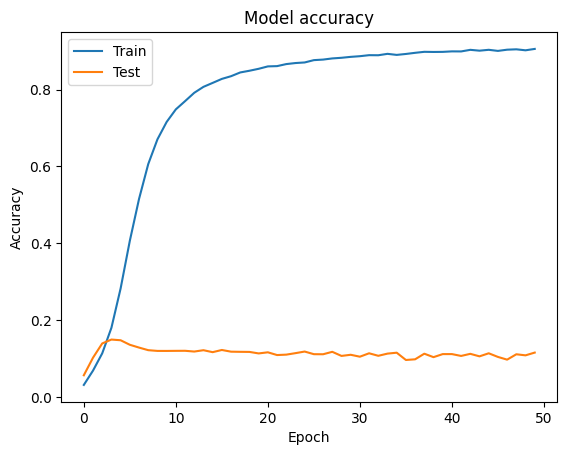

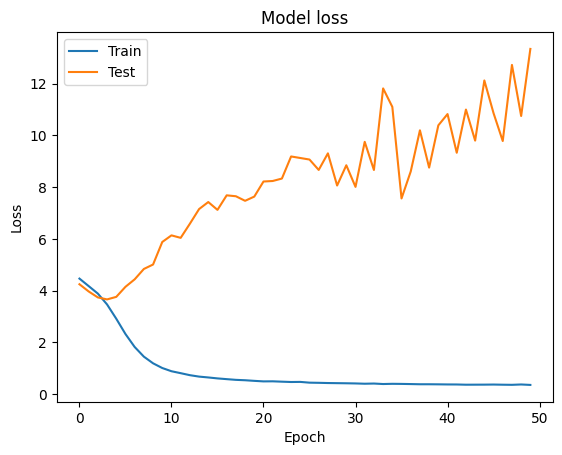

In [20]:
import matplotlib.pyplot as plt

# Plot training & test accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()